In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('spotify-2023.csv', encoding = 'cp1251')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [2]:
print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [3]:
missing_data = data.isna().sum()
print(missing_data)


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [4]:
data.shape

(953, 24)

In [5]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

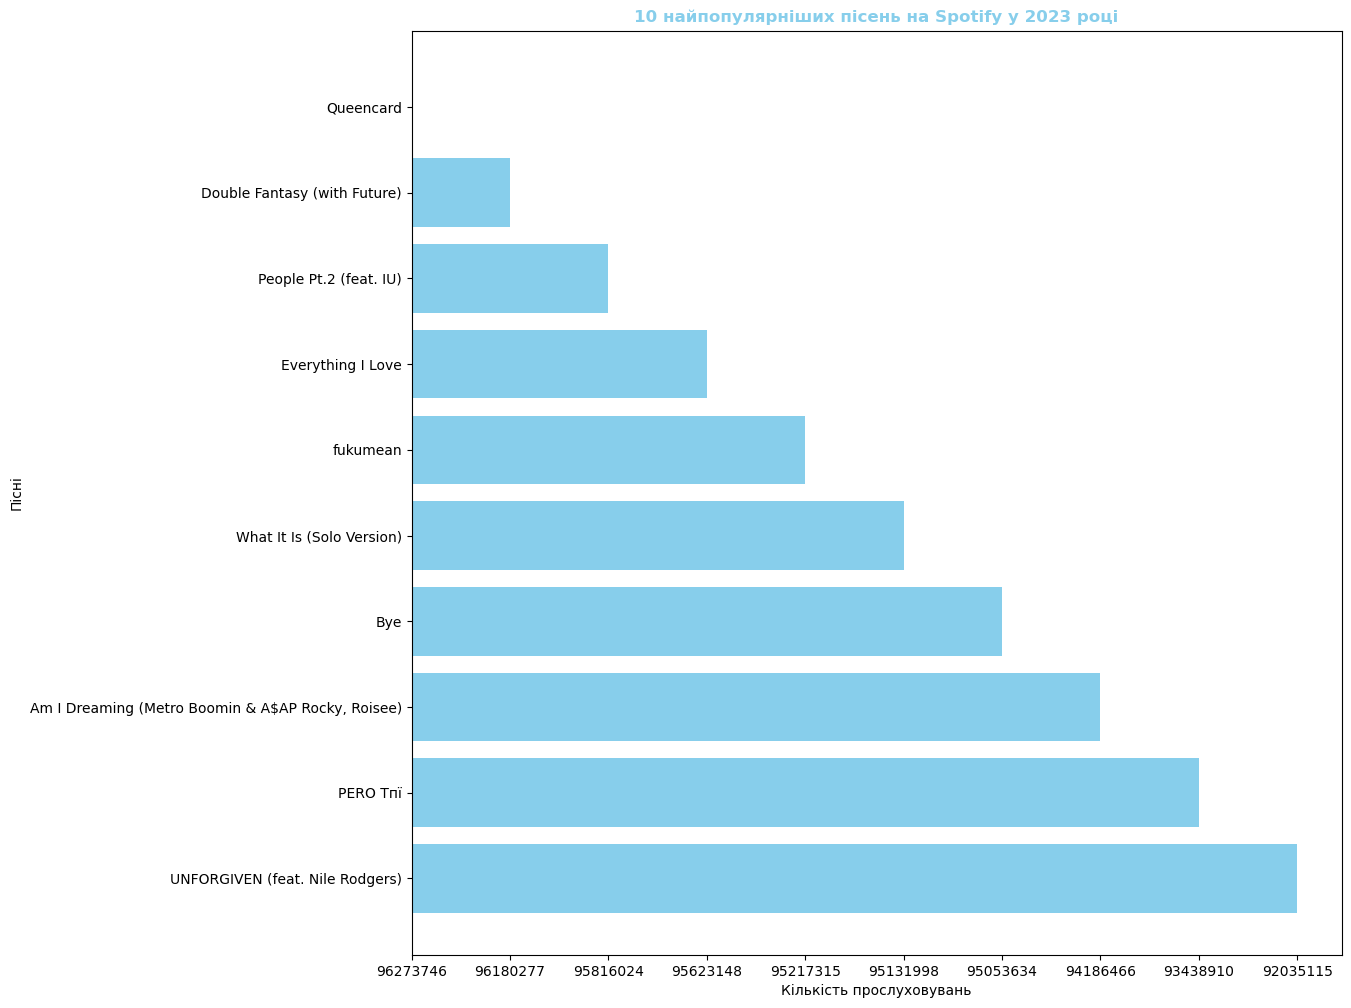

In [6]:
"""1. Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 
найпопулярніших пісень на Spotify у 2023 році за кількістю 
прослуховувань."""

s_23 = data[data["released_year"] == 2023]
top_s = s_23.sort_values(by = "streams", ascending = False).head(10)

plt.figure(figsize=(12, 12))
plt.barh(top_s["track_name"], top_s["streams"], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Пісні')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році', fontweight='bold', color='skyblue')
plt.gca().invert_yaxis() 
plt.show()

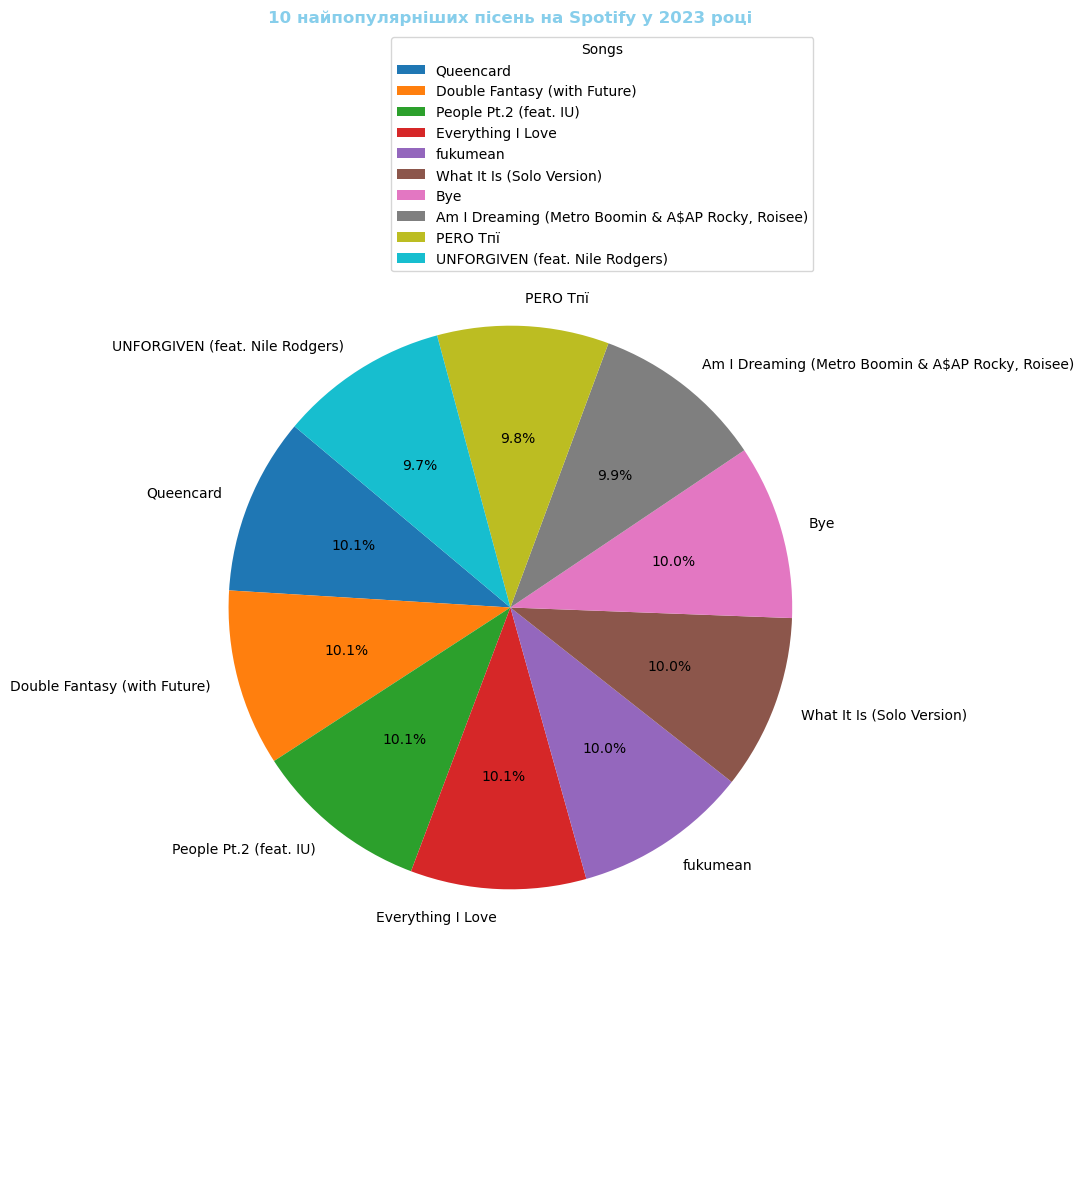

In [7]:
"""Побудувати кругову діаграму для тих самих даних"""
s_23 = data[data["released_year"] == 2023]
top_s = s_23.sort_values(by = "streams", ascending = False).head(10)

plt.figure(figsize=(8, 15))
plt.pie(top_s["streams"], labels= top_s["track_name"], autopct='%1.1f%%', startangle=140)
plt.title('10 найпопулярніших пісень на Spotify у 2023 році', fontweight='bold', color='skyblue')
plt.axis('equal')  
plt.legend(title = "Songs", loc="best")
plt.show()

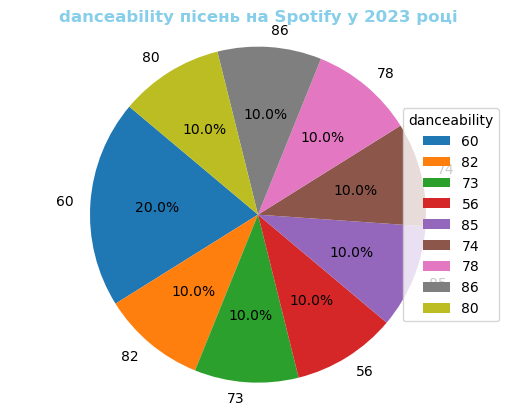

In [8]:
"""2.Створіть кругову діаграму або секторну діаграму, яка відображає розподіл
за danceability серед найпопулярніших пісень у 2023 році."""

dance_counts = top_s["danceability_%"].value_counts()
plt.tight_layout()
plt.pie(dance_counts, labels = dance_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('danceability пісень на Spotify у 2023 році', fontweight='bold', color='skyblue')
plt.axis('equal')  
plt.legend(title = "danceability", loc="right")
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_14072\1781423742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['streams'] = data['streams'].astype('float64')


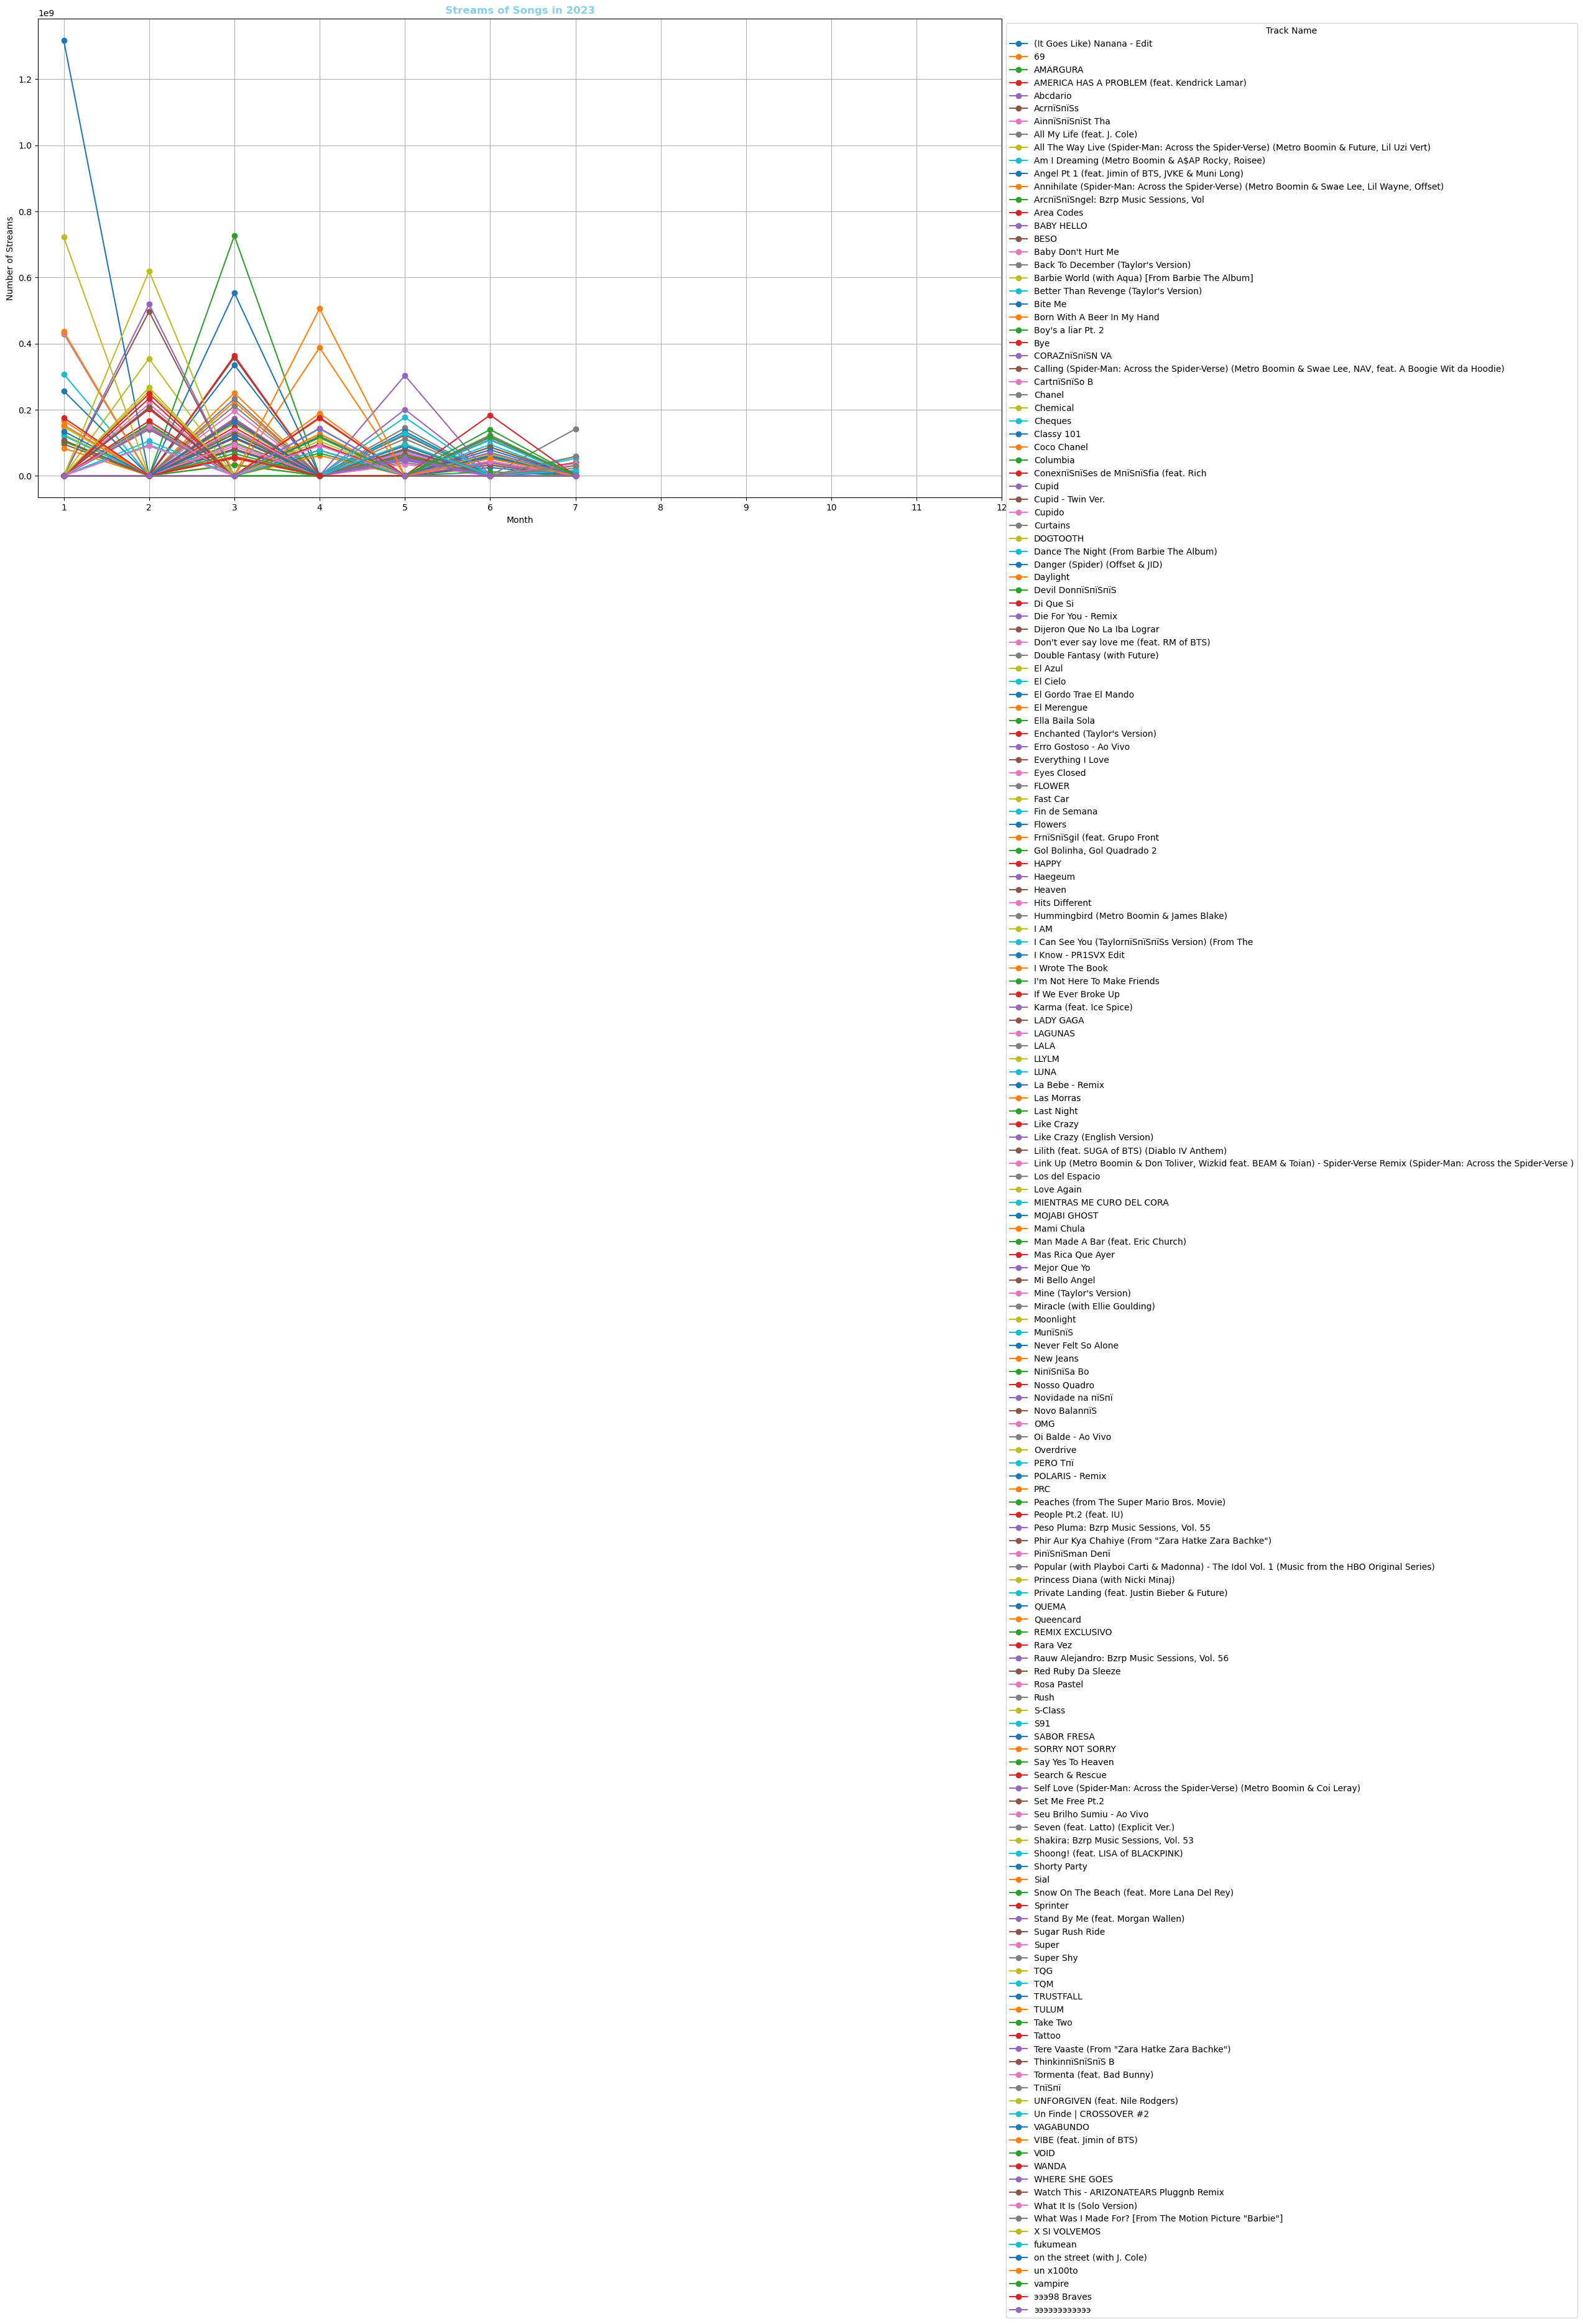

In [9]:
"""3.Побудуйте лінійний графік, який відображає зміни кількості прослуховувань 
певного треку протягом року 2023 року."""

data = data[pd.to_numeric(data['streams'], errors='coerce').notna()]
data['streams'] = data['streams'].astype('float64')

data_2023 = data[data["released_year"] == 2023]

monthly_streams = data_2023.groupby(['released_month', 'track_name'])['streams'].sum().unstack().fillna(0)

plt.figure(figsize=(20, 10))
for track_name in monthly_streams.columns:
    plt.plot(monthly_streams.index, monthly_streams[track_name], marker='o', label=track_name)

plt.title('Streams of Songs in 2023', fontweight='bold', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.xticks(range(1, 13))  
plt.legend(title='Track Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



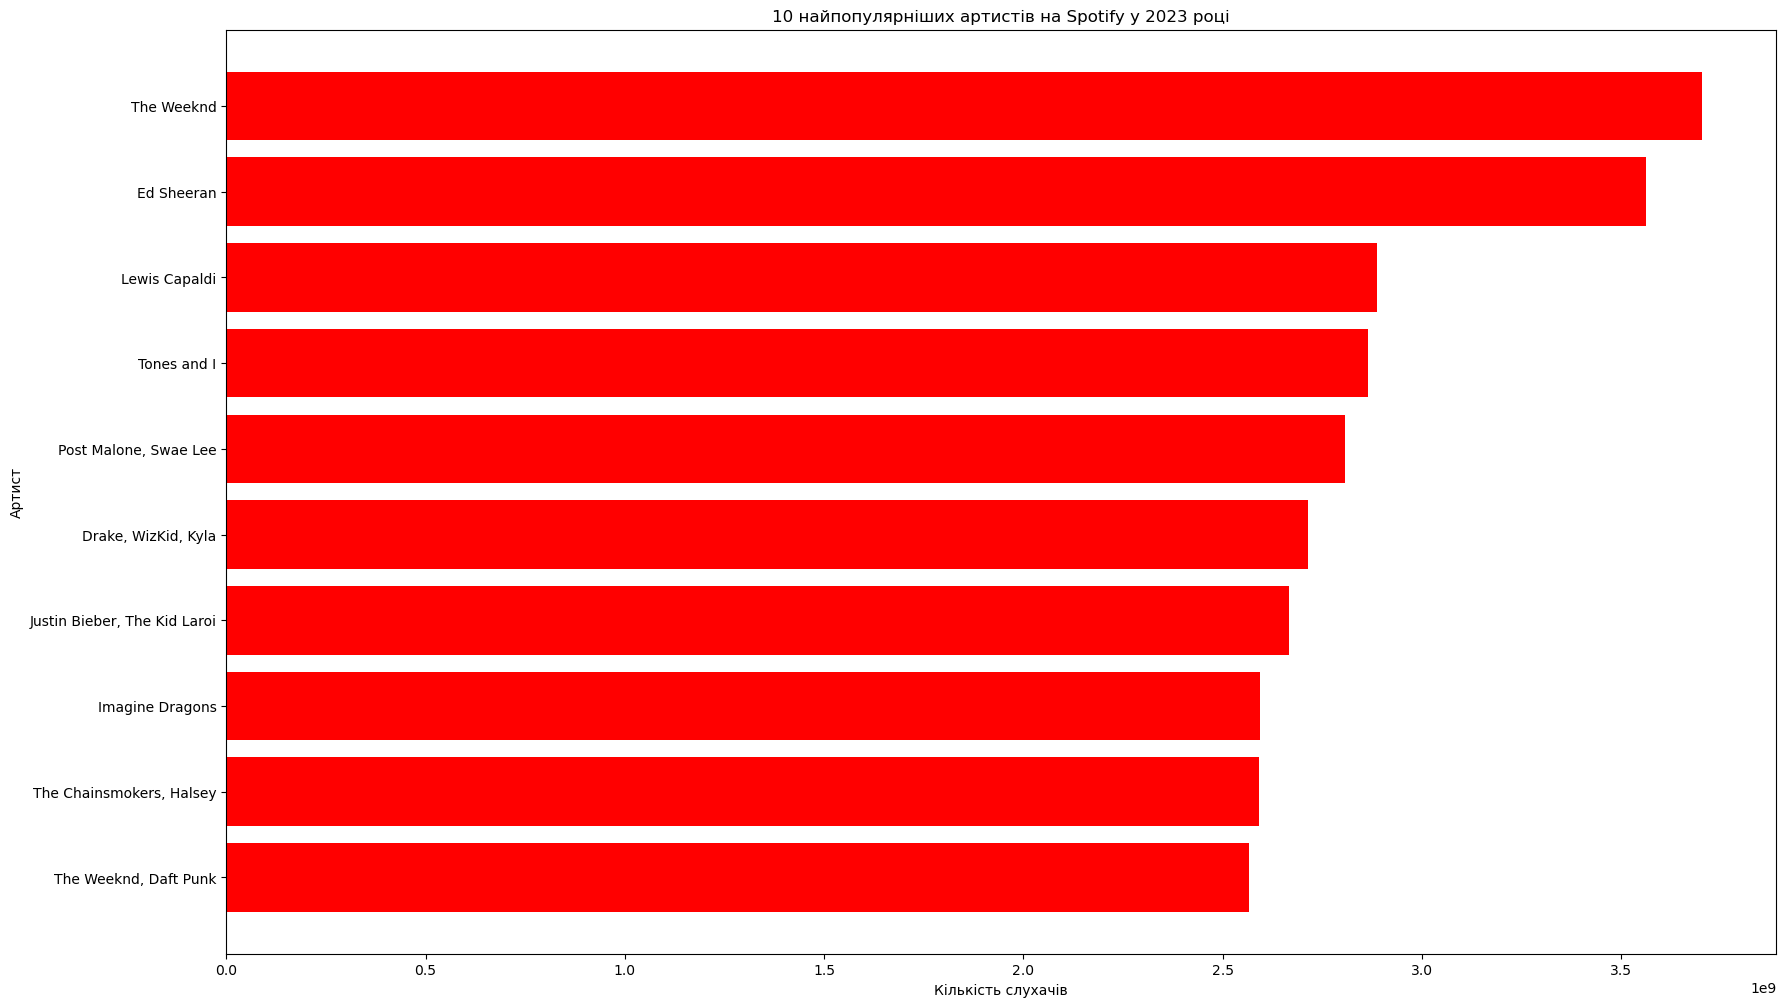

In [10]:
'''4.Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших 
артистів на Spotify у 2023 році за кількістю слухачів.'''

data = data.sort_values(by="streams", ascending=False)
top_10_artists = data.head(10)

plt.figure(figsize=(20, 12))
plt.barh(top_10_artists['artist(s)_name'], top_10_artists['streams'], color='red')
plt.xlabel('Кількість слухачів')
plt.ylabel('Артист')
plt.title('10 найпопулярніших артистів на Spotify у 2023 році')
plt.gca().invert_yaxis()

#plt.legend(title="top_10_artists", loc="right")
plt.show()

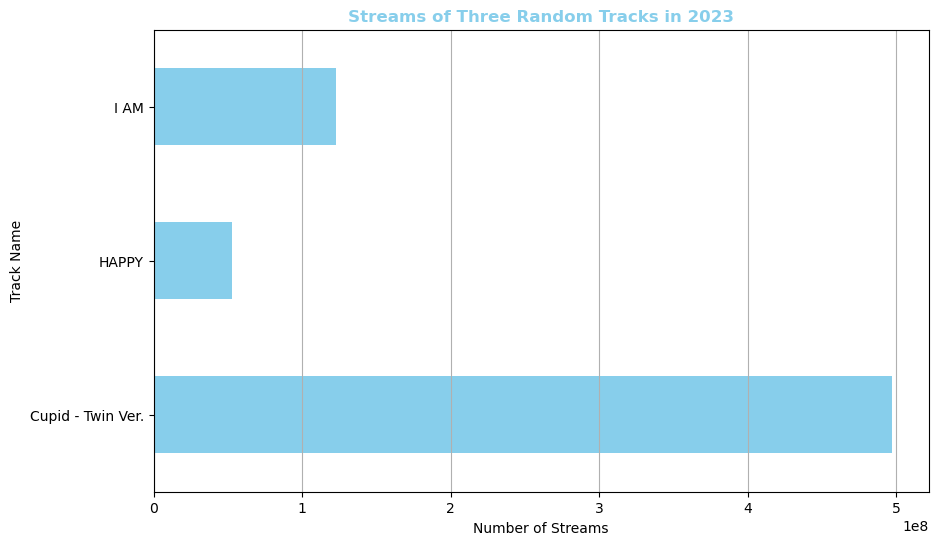

In [11]:
'''5.Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість 
прослуховувань трьох конкретних треків у 2023 році.'''


import random
# Assuming 'data' is your DataFrame

# Filter the DataFrame to include only data from the year 2023
data_2023 = data[data["released_year"] == 2023]

# Select three tracks randomly
random_tracks = random.sample(list(data_2023["track_name"].unique()), 3)

# Filter data for the randomly selected tracks
tracks_data = data_2023[data_2023["track_name"].isin(random_tracks)]

# Group by 'track_name' and sum the 'streams' for each track
tracks_streams = tracks_data.groupby('track_name')['streams'].sum()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
tracks_streams.plot(kind='barh', color='skyblue')
plt.title('Streams of Three Random Tracks in 2023', fontweight='bold', color='skyblue')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')
plt.grid(axis='x')
plt.show()

